<a href="https://colab.research.google.com/github/balhyo-younjisang/DeepLearning-from-Scratch/blob/main/Chapter_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 3 신경망
퍼셉트론으로 복잡한 함수도 표현할 수 있지만 가중치를 설정하는 작업은 여전히 사람이 수동으로 한다.   
신경망의 중요한 성질 중 하나는 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이다.

이번 장에선 신경망의 개요를 설명하고 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 자세히 알아본다.

## 3.1 퍼셉트론에서 신경망으로

신경망은 퍼셉트론과 공통점이 많다.


### 3.1.1 신경망의 예

신경망을 그림으로 나타내면 아래 그림과 같다.

![](https://sean-parkk.github.io/assets/images/DLscratch/3/Untitled.png)

가장 왼쪽 줄을 **입력층**, 맨 오른쪽 줄을 **출력층**, 중간 줄을 **은닉층**이라고 한다.   
은닉층의 뉴런은 입력층이나 출력층과 달리 사람 눈에는 보이지 않는다.   

> 위 그림의 신경망은 모두 3층으로 구성되지만 가중치를 갖는 층은 2개뿐이기 때문에 2층 신경망이라고 한다.   
> 문헌에 따라 신경망을 구성하는 층수를 기준으로 3층 신경망이라고 하는 경우도 있다.

### 3.1.2 퍼셉트론 복습

[ 그림 3-2 ]   
![](https://sean-parkk.github.io/assets/images/DLscratch/3/Untitled%201.png)

[ 그림 3-2 ]는 x1과 x2라는 두 신호를 입력받아 y를 출력하는 퍼셉트론이다.   
이 퍼셉트론을 수식으로 나타내면 [ 식 3.1 ]이 된다.

[ 식 3.1 ]    
![](https://velog.velcdn.com/cloudflare/bbirong/e1c238c4-ffb1-4845-9c0e-e09dfdcd3650/image.png)

여기서 b는 **편향**을 나타내는 매개변수로, 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다.   
한편, w1과 w2는 각 신호의 **가중치**를 나타내는 매개변수로 각 신호의 영향력을 제어한다.   

그런데 [ 그림 3-2 ]의 네트워크에는 편향 b가 보이지 않는다. 여기에 편향을 명시한다면 [ 그림 3-3 ]과 같이 나타낼 수 있다.
   

[ 그림 3-3 ]   
![](https://blog.kakaocdn.net/dn/tDBdb/btqBWrhb8DH/o5YqPEkUetDy5P0xqVjL3k/img.png)

[ 그림 3-3 ]에서는 가중치가 b이고 입력이 1인 뉴런이 추가되었다.    
이 퍼셉트론의 동작은 x1, x2, 1이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달된다.   

다음 뉴런에서는 이 신호들의 값을 더하여, 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다.
> 편향의 입력 신호는 항상 1이기 때문에 회색으로 구별했다.

[ 식 3-1 ]을 더 간결한 형태로 다시 작성하기 위해 조건 분기의 동작 ( 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력 ) 을 하나의 함수로 나타낸다.   
이 함수를 h(x)라고 하면 [ 식 3-1 ]을 다음과 같이 [ 식 3-2 ]와 [ 식 3-3 ] 으로 표현할 수 있다.

[ 식 3-2 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/e%203.2.png?raw=true)
   

[ 식 3-3 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/e%203.3.png?raw=true)

[ 식 3-2 ]는 입력 신호의 총합이 h(x)라는 함수를 거쳐 변환되어, 그 변횐된 값이 y의 출력이 됨을 보여준다.   
그리고 [ 식 3-3 ]의 h(x) 함수는 입력이 0을 넘으면 1을 돌려주고 그렇지 않으면 0을 돌려준다.

> 결과적으로 [ 식 3-1 ]이 하는 일과 [ 식 3-2 ]와 [ 식 3-3 ] 이 하는 일은 같다.



### 3.1.3 활성화 함수의 등장

입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 **활성화 함수 ( activation function )** 라 한다.

> '활성화'라는 이름이 말해주듯 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.

[ 식 3-2 ]는 다음과 같이 2개의 식으로 나눌 수 있다.

[ 식 3-4 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/e%203.4.png?raw=true)    

[ 식 3-5 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/e%203.5.png?raw=true)

[ 식 3-4 ]는 가중치가 달린 입력 신호와 편향의 총합을 계산하고, 이를 a라 한다.   
그리고 [ 식 3-5 ]는 a를 함수 h()에 넣어 y를 출력하는 흐름이다.   

지금까지와 같이 뉴런을 큰 원으로 그려보면 [ 식 3-4 ]와 [ 식 3-5 ]는 [ 그림 3-4 ]처럼 나타낼 수 있다.

[ 그림 3-4 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-4.png?raw=true)

보다시피 [ 그림 3-4 ]에서는 기존 뉴런의 원을 키우고, 그 안에 활성화 함수의 처리 과정을 명시적으로 그려 넣었다.   
즉, 가중치 신호를 조합한 결과가 a라는 노드가 되고, 활성화 함수 h()를 통과하여 y라는 노드로 변환되는 과정이 분명하게 나타나 있다. ( 이 서적에선 뉴런과 노드라는 용어는 같은 의미로 사용된다. )

뉴런을 그릴 때 보통은 지그까지와 마찬가지로 [ 그림 3-5 ]의 왼쪽처럼 뉴런을 하나의 원으로 그리고 신경망의 동작을 더 명확히 드러내고자 할 때는 오른쪽 그림처럼 활성화 처리 과정을 명시하기도 한다.   

[ 그림 3-5 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-5.png?raw=true)


## 3.2 활성화 함수

[ 식 3-3 ]과 같은 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 **계단 함수(step function)**이라 한다.    
활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠이다.



### 3.2.1 시그모이드 함수

다음은 신경망에서 자주 이용하는 활성화 함수인 **시그모이드 함수(sigmoid function)**를 나타낸 식이다.

[ 식 3-6 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/e%203.6.png?raw=true)

[ 식 3-6 ]에서 exp(-x)는 e^-x를 뜻하며 e는 자연상수로 2.7182...의 값을 갖는 실수이다.   

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다.   

> 퍼셉트론과 앞으로 볼 신경망의 주된 차이는 활성화 함수뿐이다.

### 3.2.2 계단 함수 구현하기

계단 함수는 [ 식 3-3 ]과 같이 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수이다.   
다음은 이런 계단 함수를 단순하게 구현한 것이다.

In [1]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

이 구현은 단순하고 쉽지만, 인수 x는 실수 ( 부동소수점 )만 받아들인다.   
즉 step_function(3.0) 은 되지만 넘파이 배열을 인수로 넣을 수는 없다. 넘파이 배열도 지원할 수 있도록 수정하려면 다음과 같이 구현할 수 있다.

In [7]:
import numpy as np

def step_function(x):
  y = x > 0
  return y.astype(np.int)

넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다.   
위 예에서는 배열 x의 원소 각각이 0보다 크면 True로, 0 이하면 False로 변환한 새로운 배열 y가 생성된다.

넘파이 배열의 자료형을 변환할 때는 astype() 메서드를 이용한다.

### 3.2.3 계단 함수의 그래프

<ipython-input-6-0007b6fb8766>:5: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  return np.array(x > 0, dtype = np.integer)


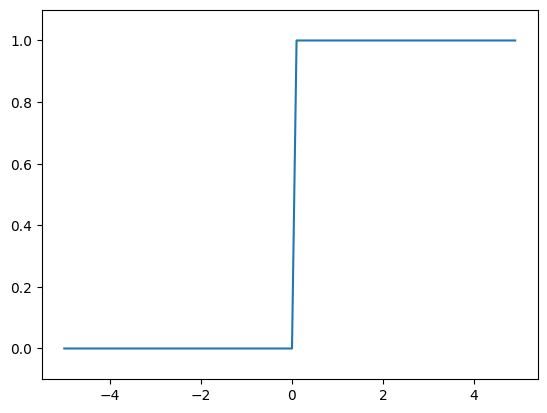

In [6]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype = np.integer)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

np.arrange(-5.0, 5.0, 0.1)은 -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열을 생성한다.   
즉 [-5.0, -4.9, ... 4.9 ] 를 생성한다. step_function() 은 인수로 받은 넘파이 배열의 원소 각각을 인수로 계단 함수 실행해, 그 결과를 다시 배열로 만들어 돌려줍니다.   

이 x,y 배열을 그래프로 그리면(plot) 결과는 [ 그림 3-6 ]처럼 된다.

[ 그림 3-6 ]
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-6.png?raw=true)

[ 그림 3-6 ]에서 보듯 계단 함수는 0을 경계로 출력이 0에서 1 ( 또는 1에서 0 ) 으로 바뀐다.

### 3.2.4 시그모이드 함수 구현하기

[ 식 3-6 ]의 시그모이드 함수는 파이썬으로 다음과 같이 작성할 수 있다.

In [4]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

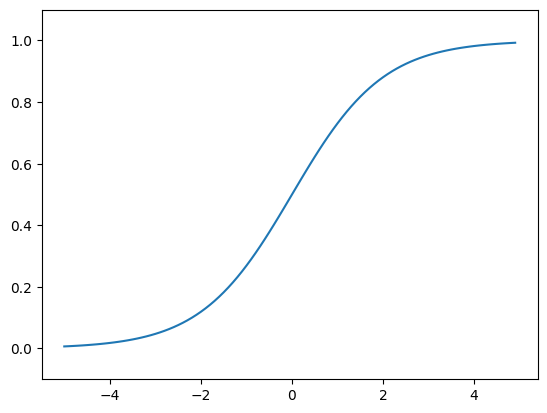

In [7]:
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

[ 그림 3-8 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-8.png?raw=true)

[ 그림 3-8 ]을 보고 가장 먼저 느껴지는 점은 '매끄러움'의 차이일 것이다.   
시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다. 한편, 계단 함수는 0을 경계로 출력이 갑자기 바뀌어버린다.   

시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다.
퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀지만, 신경망에서는 연속적인 실수가 흐른다.  


공통점으로는 둘 다 입력이 작을 때의 출력은 0에 가깝고 (혹은 0이고), 입력이 커지면 1에 가까워지는 (혹은 1이 되는) 구조이다.

### 3.2.6 비선형 함수

계단 함수와 시그모이드 함수의 중요한 공통점으로는 모두 **비선형 함수** 이다. 시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타나며, 동시에 비선형 함수로 분류된다.

>출력이 입력의 상수배만큼 변하는 함수를 **선형 함수** 라고 하며 곧은 1개의 직선이 된다.   
 **비선형 함수**는 문자 그대로 '선형이 아닌' 함수이다. 즉, 직선 1개로는 그릴 수 없는 함수를 말한다.

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 떄문이다.  

선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는 데 있다.
층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다.

### 3.2.7 ReLU 함수

시그모이드 함수는 신경망 분야에서 오래전부터 이용해왔으나, 최근에는 **ReLU 함수**를 주로 이용한다.

ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수이다.
   
    
[ 그림 3-9 ]    
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-9.png?raw=true)

수식으로는 [ 식 3-7 ]처럼 쓸 수 있다.

[ 식 3-7 ]
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/e%203.7.png?raw=true)

그래프와 수식에서 보듯 간단한 ReLU 함수는 다음과 같이 구현할 수 있다.   



In [ ]:
import numpy as np

def relu(x):
  return np.maximum(0, x)

> 넘파이의 maximum 함수는 두 입력 중 큰 값을 선택해 반환하는 함수이다.

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

다차원 배열도 그 기본은 '숫자의 집합'이다.   
숫자가 한 줄로 늘어선 것이나 직사각형으로 늘어놓은 것, 3차원으로 늘어놓은 것이나, N차원으로 나열하는 것을 통틀어 다차원 배열이라고 한다.   

넘파이를 사용해 다차원 배열을 작성해보자.   
우선 1차원 배열의 예이다.

In [8]:
import numpy as np

A = np.array([1,2,3,4])
print(A)
print(np.ndim(A)) # 배열의 차원 수를 확인하는 함수 : ndim()
print(A.shape) # 배열의 형상, 튜플을 반환
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


2차원 배열의 예이다.   
여기에서는 '3 x 2 배열' 인 B를 작성했다. 3 x 2 배열은 처음 차원에는 원소가 3개, 다음 차원에는 원소가 2개 있다는 의미이다.   

2차원 배열은 특히 **행렬 ( matrix )**이라고 부르고 다음 그림과 같이 배열의 가로 방향을 **행 ( row )**, 세로 방향을 **열 ( column )** 이라고 한다.

![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-10.png?raw=true)

In [9]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 3.3.2 행렬의 곱

2 x 2 행렬의 곱은 [ 그림 3-11 ]처럼 계산한다.

[ 그림 3-11 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-11.png?raw=true)

그림에서처럼 행렬 곱은 왼쪽 행렬의 행 ( 가로 )과 오른쪽 행렬의 열 ( 세로 )을 원소별로 곱하고 그 값들을 더해서 계산한다.  
그리고 그 계산 결과가 새로운 다차원 배열의 원소가 된다.
이 계산을 파이썬으로 구현하면 다음과 같다.

In [10]:
A = np.array([[1,2], [3,4]])
print(A.shape)

B = np.array([[5,6], [7,8]])
print(B.shape)

np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

이 코드에서 A와 B는 2 x 2 행렬이며, 이 두 행렬의 곱은 넘파이 함수 np.dot()으로 계산한다.
np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산한다.

> np.dot(A, B)와 np.dot(B,A)는 다른 값으 될 수 있다. +와 * 등의 일반적인 연산과 달리 행렬의 곱에서는 피연산자의 순서가 다르면 결과도 다르다.

앞에서는 2 x 2 행렬을 곱하는 예를 보았지만, 형상이 다른 행렬의 곱도 마찬가지 방법으로 계산할 수 있다.
다음은 2 x 3 행렬과 3 x 2 행렬의 곱을 파이썬으로 구현한 모습이다.

In [11]:
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)

B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)

np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

2 x 3 행렬 A와 3 x 2 행렬 B의 곱은 이와 같이 구현할 수 있다. 이때 '행렬의 형상 (shape)'에 주의해야 한다.    
구체적으로 말하면 행렬 A의 1번째 차원의 원소 수 (열 수) 와 행렬 B의 0번째 차원의 원소 수 (행 수)가 같아야 한다. 이 값이 다르면 행렬의 곱은 계산할 수 없다.

즉, 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 한다.

### 3.3.3 신경망에서의 행렬 곱

넘파이 행렬을 써서 신경망을 구현해보자. 이번 예에서는 다음 그림의 가중치만 갖는 신경망을 가정해보낟.   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-14.png?raw=true)

이 구현에서도 X, W, Y의 형상을 주의해야 한다. 특히 X와 W의 대응하는 차원의 원소 수가 같아야 한다는 걸 잊지 말하야 한다.

In [12]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 3층 신경망 구현하기

이번에는 [ 그림 3-15 ]의 3층 신경망에서 수행되는, 입력부터 출력까지의 처리 ( 순방향 처리 )를 구현해보자.
   

[ 그림 3-15 ]
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-15.png?raw=true)

### 3.4.1 표기법 설명

이번 절에서는 신경망에서의 처리를 설명하며 w₁⑴ 같은 표기법을 사용한다.    
[ 그림 3-16 ]을 보면 입력층의 뉴런 x₂에서 다음 층의 뉴런 a₁⑴ 으로 향하는 선 위에 가중치를 표시하고 있다.

[ 그림 3-16 ]
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-16.png?raw=true)

[ 그림 3-16 ]과 같이 가중치와 은닉층의 뉴런의 오른쪽 위에는 '⑴'이 붙어있다. 이는 1층의 가중치, 1층의 뉴런임을 뜻하는 번호이다. 또, 가중치의 오른쪽 아래의 두 숫자는 차례로 다음 층 뉴런과 앞 층 뉴런의 인덱스 번호이다.

> 이 순서를 반대로 표기하는 경우도 많으니 다른 자료를 볼 때 순서를 유의해서 확인하자.

### 3.4.2 각 층의 신호 전달 구현하기

[ 그림 3-17 ]과 같이 '1층의 첫번째 뉴런'으로 가는 신호를 살펴보자.

[ 그림 3-17 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-17.png?raw=true)

[ 그림 3-17 ]에는 편향을 뜻하는 뉴런인 ①이 추가되었다.

지금까지 확인한 것을 반영하여 a₁¹을 수식으로 나타내보자.  
a₁¹은 가중치를 곱한 신호 두 개와 편향을 합해서 다음과 같이 계산한다.

[ 식 3-8 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/e%203.8.png?raw=true)

여기에서 행렬의 곱을 이용하면 1층의 '가중치 부분'을 다음 식처럼 간소화할 수 있다.

[ 식 3-9 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/e%203.9.png?raw=true)

넘파이의 다차원 배열을 사용해 [ 식 3-9 ]를 구현해보자.( 입력 신호, 가중치, 편향은 적당한 값으로 설정한다. )

In [2]:
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape) # (2, )
print(B1.shape) # (3, )

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


이어서 1층의 활성화 함수에서의 처리를 살펴보자.   
이 활성화 함수의 처리를 그림처럼 나타내면 다음 그림과 같다.

[ 그림 3-18 ]
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-18.png?raw=true)

[ 그림 3-18 ]과 같이 은닉층에서의 가중치 합 (가중 신호와 편향의 총합)을 a로 표기하고 활성화 함수 h()로 변환된 신호를 z로 표기한다.   
여기에서는 활성화 함수로 시그모이드 함수를 사용한다.


In [6]:
Z1 = sigmoid(A1)

print(A1) # [0.3 0.7 1.1]
print(Z1) # [0.57444252 0.66818777 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


이어서 1층에서 2층으로 가는 과정 ( 그림 3-19 )과 그 구현을 살펴보자

[ 그림 3-19 ]
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-19.png?raw=true)

In [9]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3, )
print(W2.shape) # (3, 2)
print(B2.shape) # (2, )

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2) # [0.51615984 1.21402696]
print(Z2) # [0.62624937 0.7710107 ]

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


2층에서 출력층으로의 신호 전달이다. ( 그림 3-20 ), 출력층의 구현도 그동안의 구현과 거의 같지만, 활성화함수만 지금까지의 은닉층과 다르다.

[ 그림 3-20 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-20.png?raw=true)

In [12]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3
print(Y)

[0.31682708 0.69627909]


여기에서는 항등 함수인 identity_function() 을 정의하고, 이를 출력층의 활성화 함수로 이용했다.   
항등 함수는 입력을 그대로 출력하는 함수이다.

또 [ 그림 3-20 ]에서는 출력층의 활성화 함수를 σ()로 표시하여 은닉층의 활성화 함수 h()와는 다름을 명시했다.(σ는 '시그마'라고 읽는다.)

> 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.예를 들어 회귀에는 항등 함수를, 2클래스 분류에는 시그모이드 함수를, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.

### 3.4.3 구현 정리

신경망 구현의 관례에 따라 가중치만 W1과 같이 대문자로 쓰고, 그 외 편향과 중간 결과 등은 모두 소문자로 썼다.

In [13]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [0.31682708 0.69627909]

[0.31682708 0.69627909]


여기에서는 init_network()와 forward()라는 함수를 정의했다.    
init_network() 함수는 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장한다.   
이 딕셔너리 변수 network에는 각 층에 필요한 매개변수(가중치와 편향)를 저장했다.   
그리고 forward() 함수는 입력 신호를 출력으로 변환하는 처리 과정을 모두 구현하고 있다.

함수 이름을 forward라 한 것은 신호가 순방향(입력에서 출력 방향)으로 전달됨(순전파)을 알리기 위함이다.   

## 3.5 출력층 설계하기

신경망은 분류와 회귀 모두에 이용할 수 있다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.   
일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.

> 기계학습 문제는 **분류(classification)**와 **회귀(regression)**로 나뉜다.   
분류는 데이터가 어느 클래스(class)에 속하느냐는 문제이다.사진 속 인물의 성별을 분류하는 문제가 여기에 속한다. 회귀는 입력 데이터에서 (연속적인) 수치를 예측하는 문제이다. 사진 속 인물의 몸무게(57.4kg?)를 예측하는 문제가 회귀이다.

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

**항등 함수(identity function)**는 입력을 그대로 출력한다. 입력과 출력이 항상 같다는 뜻의 항등이다.   
그래서 출력층에서 항등 함수를 사용하면 입력 신호가 그대로 출력 신호가 된다.   
항등 함수의 처리는 신경망 그림으로는 [ 그림 3-21 ]처럼 된다. 항등 함수에 의한 변환은 은닉층에서의 활성화 함수와 마찬가지로 화살표로 그린다.

[ 그림 3-21 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-21.png?raw=true)

한편, 분류에서 사용하는 **소프트맥스 함수 ( softmax function )**의 식은 다음과 같다.

[ 식 3-10 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/e%203.10.png?raw=true)

exp(x)는 e^x을 뜻하는 지수 함수(exponential function)이다(e는 자연상수).   
n은 출력층의 뉴런 수, yk는 그 중 k번째 출력임을 뜻한다.   

[ 식 3-10 ]과 같이 소프트맥스 함수의 분자는 입력 신호 ak의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다.

이 소프트맥수 함수를 그림으로 나타내면 [ 그림 3-22 ]처럼 된다. 그림과 같이 소프트맥스의 츌력은 모든 입력 신호로부터 화살표를 받는다.   

[ 식 3-10 ]의 분모에서 보듯, 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문이다.

[ 그림 3-22 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-22.png?raw=true)

In [18]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [19]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

앞 절에서 구현한 softmax() 함수의 코드는 [ 식 3-10 ]을 제대로 표현하고 있다.  
컴퓨터로 계산할 때는 오버플로 결함이 있다. 소프트맥수 함수는 지수 함수를 사용하는데, 지수 함수란 것이 아주 큰 값을 내뱉기 때문이다.    
이런 큰 값끼리 나눗셈을 하면 결과 수치가 '불안정'해진다.

이 문제를 해결하도록 소프트맥수 함수 구현을 개선하면 다음과 같다.

[ 식 3-11 ]
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/e%203.11.png?raw=true)

[ 식 3-11 ]의 전개 과정을 살펴보면 첫번째 변형에서는 C라는 임의의 정수를 분자와 분모 양쪽에 곱했다.   
그다음으로 C를 지수 함수 exp() 안으로 옮겨 logC로 만든다.   
마지막으로 logC를 C'라는 새로운 기호로 바꾼다.

[ 식 3-11 ]이 말하는 것은 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않는다는 것이다.   
여기서 C'에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다.

In [20]:
a = np.array([1010, 1000, 990])

print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산, 제대로 계산되지 않는다.
c = np.max(a) # c = 1010 ( 최댓값 )
print(a - c)
print(np.exp(a - c) / np.sum(np.exp(a - c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


<ipython-input-20-80c1a208ec9e>:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산
<ipython-input-20-80c1a208ec9e>:3: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a) / np.sum(np.exp(a))) # 소프트맥스 함수의 계산


위 예에서 보는 것처럼 아무런 조치 없이 그냥 계산하면 nan이 출력된다. (nan은 not a number이다.)   
하지만 입력 신호 중 최댓값 ( 이 예에서는 c ) 을 빼주면 올바르게 계산할 수 있다.이를 바탕으로 소프트맥스 함수를 다시 구현하면 다음과 같다.

In [21]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # 오버플로 대책
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 3.5.3 소프트맥스 함수의 특징

softmax() 함수를 사용하면 신경망의 출력은 다음과 같이 계산할 수 있다.

In [22]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


보는 바와 같이 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이다. 또, 소프트맥스 함수 출력의 총합은 1이다.   

출력 총합이 1이 된다는 점은 소프트맥수 함수의 중요 성질이다.   
이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.   
가령 앞의 예에서 y[0]의 확률은 0.018 (1.8%), y[1]의 확률은 0.245 (24.5%) 로 해석할 수 있다. y[2]의 확률은 0.737 (73.7%)로 해석할 수 있다.   
그리고 이 결과 확률들로부터 "2번째 원소의 확률이 가장 높으니, 답은 2번째 클래스다" 라고 할 수 있다.   
혹은 "74%의 확률로 2번째 클래스. 25%의 확률로 1번째 클래스, 1번째 확률로 0번째 클래스다" 와 같이 확률적인 결론도 낼 수 있다.   
즉, 소프트맥스 함수를 이용함으로써 문제를 확률적 ( 통계적 ) 으로 대응할 수 있게 되는 것이다.

여기서 주의점으로, 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 이 지수 함수 y = exp(x)가 단조 증가 함수이기 때문이다.  
> 단조 증가 함수란 정의역 원소 a,b가 a ≤ b일 때 f(a) ≤ f(b)가 성립하는 함수이다.

신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다.   
그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다. 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥수 함수를 생략해도 된다. ( 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥수 함수는 생략하는 것이 일반적이다. )

> 기계학습의 문제 풀이는 **학습**과 **추론(inference)**의 두 단계를 거쳐 이뤄진다. 학습 단계에서 모델을 학습하고, 추론 단계에서 앞서 학습한 모델로 미지의 데이터에 대해서 추론(분류)를 수행한다.
> 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적인 한편, 신경망을 학습시킬 때는 출력층에서 소프트맥스 함수를 사용한다.

### 3.5.4 출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다. 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.   
예를 들어 입력 이미지를 숫자 0부터 9 중 하나로 분류하는 문제라면 [ 그림 3-23 ] 처럼 출력층의 뉴런을 10개로 설정한다.

[ 그림 3-23 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203.23.png?raw=true)

[ 그림 3-23 ]의 예에서 출력층 뉴런은 위에서부터 차례로 숫자 0, 1, ... 9에 대응하며, 뉴런의 회색 농도가 해당 뉴런의 출력 값의 크기를 의미한다.    
이 예에서는 색이 가장 짙은 y2 뉴런이 가장 큰 값을 출력하는 것이다.  
그래서 이 신경망이 선택한 클래스는 y2, 즉 입력 이미지를 숫자 '2'로 판단했음을 의미한다.



## 3.6 손글씨 숫자 인식

이번 절에서는 이미 학습된 매개변수를 사용하여 학습 과정은 생략하고, 추론 과정만 구현한다.   
이 추론 과정을 신경망의 **순전파(forward propagation)**라고도 한다.


> 기계학습과 마찬가지로 신경망도 두 단계를 거쳐 문제를 해결한다. 먼저 훈련 데이터(학습 데이터)를 사용해 가중치 매개변수를 학습하고, 추론 단계에서는 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류한다.

### 3.6.1 MNIST 데이터셋

이번 예에서 사용하는 데이터셋은 MNIST라는 손글씨 숫자 이미지 집합이다. MNIST는 기계학습 분야에서 유명한 데이터셋으로, 간단한 실험부터 논문으로 발표되는 연구까지 다양한 곳에서 이용된다.

MNIST 데이터셋은 0부터 9까지의 숫자 이미지로 구성된다. (그림 3-24). 훈련 이미지가 60,000장, 시험 이미지가 10,000장 준비되어 있다.   
일반적으로 이 훈련 이미지들을 사용하여 모델을 학습하고, 학습한 모델로 시험 이미지들을 얼마나 정확하게 분류하는지를 평가한다.

[ 그림 3-24 ]   
![](https://github.com/youbeebee/deeplearning_from_scratch/blob/master/images/fig%203-24.png?raw=true)

MNIST의 이미지 데이터는 28 x 28 크기의 회색조 이미지 (1채널)이며, 각 픽셀은 0에서 255까지의 값을 취한다. 각 이미지에는 '7', '2', '1'과 같이 그 이미지가 실제 의미하는 숫자가 레이블로 붙어 있다.




데이터를 특정 범위로 변환하는 처리를 **정규화(normalization)**이라고 하고, 신경망의 입력 데이터에 특정 변환을 가하는 것을 **전처리(pre-processing)**라 한다.